# **KNN机器学习算法**

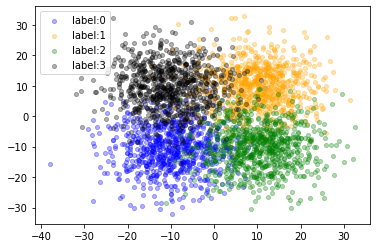

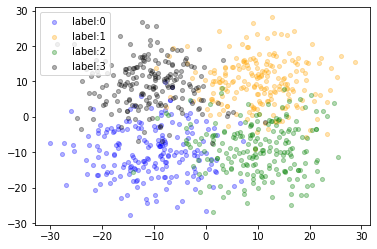

K=1, manhattan_distance, acc=0.78
K=1, euclidean_distance, acc=0.77
K=2, manhattan_distance, acc=0.78
K=2, euclidean_distance, acc=0.77
K=3, manhattan_distance, acc=0.82
K=3, euclidean_distance, acc=0.82
K=4, manhattan_distance, acc=0.82
K=4, euclidean_distance, acc=0.82
K=5, manhattan_distance, acc=0.83
K=5, euclidean_distance, acc=0.83
K=6, manhattan_distance, acc=0.83
K=6, euclidean_distance, acc=0.83
K=7, manhattan_distance, acc=0.83
K=7, euclidean_distance, acc=0.83
K=8, manhattan_distance, acc=0.83
K=8, euclidean_distance, acc=0.83
K=9, manhattan_distance, acc=0.84
K=9, euclidean_distance, acc=0.84
[choose K=9, distance_method=manhattan_distance]
0.83375


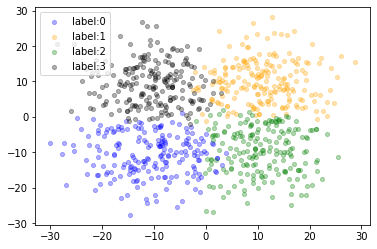

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def manhattan_distance(x1, x2):
    return np.sum(np.absolute(x1 - x2), axis=-1)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=-1))


class ModelKNN:

    def __init__(self, k=3, dis=euclidean_distance):
        self.k = k
        self.get_distance = dis
        self.train_data = None
        self.train_label = None

    def fit(self, train_data, train_label):
        assert train_data.shape[0] == train_label.shape[0]
        assert train_data.shape[1]

        self.train_data = train_data
        self.train_label = train_label

    def predict(self, test_data):
        if len(test_data) == 0:
            return []
        predict_labels = []  # [0] * test_data.shape[0]
        for x in test_data:
            x = x.reshape((-1, x.shape[0]))

            # array of distances between current test and all train_data
            distances = np.asarray(self.get_distance(self.train_data, x))

            # find the k nearest neighbors and their classifications
            knn_index = np.argsort(distances)[:self.k]
            knn_label = self.train_label[knn_index]
            max_vote = max(knn_label, key=list(knn_label).count)

            predict_labels.append(max_vote)

        return np.array(predict_labels)


class AlgorithmKNN:

    def __init__(self, fold_num=15):
        self.MAX_K = 10
        self.fold_num = fold_num
        self.model = None

    def fit(self, train_data, train_label):
        assert train_data.shape[0] == train_label.shape[0]
        assert train_data.shape[1]

        idx = np.arange(train_data.shape[0])
        np.random.shuffle(idx)
        train_data = train_data[idx]
        train_label = train_label[idx]  # shuffle the train_data

        best_acc = -1

        for k in range(1, min(self.MAX_K, train_data.shape[0] // self.fold_num + 1)):
            for distance_method in [manhattan_distance, euclidean_distance]:
                model = ModelKNN(k, distance_method)
                acc = self.cross_validation(model, self.fold_num, train_data, train_label)
                print("K={}, {}, acc={}".format(model.k, distance_method.__name__, round(acc, 2)))
                if acc > best_acc:
                    best_acc = acc
                    self.model = model  # save the model with highest accuracy

        print("[choose K={}, distance_method={}]".format(self.model.k, self.model.get_distance.__name__))

    def predict(self, test_data):
        return self.model.predict(test_data)

    @staticmethod
    def cross_validation(model, fold_num, train_data, train_label):  # cross-validation
        L = train_data.shape[0] // fold_num
        split_data = [train_data[L * i: L * i + L] for i in range(fold_num - 1)] + [train_data[L * (fold_num - 1):]]
        split_label = [train_label[L * i: L * i + L] for i in range(fold_num - 1)] + [train_label[L * (fold_num - 1):]]

        acc = []
        for i in range(fold_num):
            val_data = split_data[i]
            val_label = split_label[i]
            train_data = np.concatenate(split_data[:i] + split_data[i + 1:])
            train_label = np.concatenate(split_label[:i] + split_label[i + 1:])
            if train_data.shape[0] == 0:
                continue

            model.fit(train_data, train_label)
            if val_data.shape[0] == 0:
                acc.append(0)
            else:
                acc.append(np.mean(model.predict(val_data) == val_label))
        return sum(acc) / len(acc)


def case_demo():
    train_data = np.array([
        [1, 2, 3, 4],
        [4, 2, 3, 1],
        [12, 12, 13, 14],
        [14, 12, 13, 11],
        [12, 14, 15, 16]
    ])
    train_label = np.array([0, 0, 1, 1, 1])

    test_data = np.array([
        [3, 4, 4, 2],
        [18, 14, 15, 16]
    ])
    test_label = np.array([0, 1])
    return train_data, train_label, test_data, test_label


def test_case(mean, cov, num):  # prepare the test case
    # mean = (1, 2)
    # cov = np.array([[73, 0], [0, 22]])
    # x = np.random.multivariate_normal(mean, cov, (80,))
    #
    # mean = (16, -5)
    # cov = np.array([[21.2, 0], [0, 32.1]])
    # y = np.random.multivariate_normal(mean, cov, (20,))
    #
    # train_data = np.concatenate([x, y])
    # train_label = np.concatenate([
    #     np.zeros((80,), dtype=int),
    #     np.ones((20,), dtype=int)
    # ])
    #
    # test_data = np.array([
    #     [3, 4],
    #     [18, -2]
    # ])
    # test_label = np.array([0, 1])
    data = np.concatenate([np.random.multivariate_normal(mean[i], cov[i], (num[i],)) for i in range(4)])
    label = np.concatenate([np.ones((num[i],), dtype=int) * i for i in range(4)])

    length = len(data)
    test_data_num = length // 5

    data, label = partition(data, label)
    test_data = data[:test_data_num]
    test_label = label[:test_data_num]
    train_data = data[test_data_num:]
    train_label = label[test_data_num:]
    return train_data, train_label, test_data, test_label
def partition( data, label):

      length = len(data)
      list1 = []
      list2 = []
      list3 = []
      
      for i in range(0, length):
          list1.append([data[i], label[i]])
      
      np.random.shuffle(list1)

      for each in list1:
          list2.append(each[0])
          list3.append(each[1])

      list2 = np.array(list2)
      list3 = np.array(list3)

      return list2, list3

def plot_points(data,label,name):
    length = len(data)
    painter={}
    for i in range(length):
        if label[i] in painter.keys():
            painter[label[i]].append(data[i])
        else:
            painter[label[i]] = [data[i]]
    color=['b','orange','g','k']
    painter=dict(sorted(painter.items(),key=lambda x:x[0]))
    for each in painter:
        temp=np.asarray(painter[each])
        plt.scatter(temp[:,0],temp[:,1],c=color[each],alpha=0.3,s=17,label=f'label:{each}')
    plt.legend()
    plt.savefig(f'{name}.jpg',dpi=150)
    plt.show()

def test():
    mean=[(-10,-10),(10,10),(10,-10),(-10,10)]
    t=[[50,0],[0,50]]
    cov = np.array(t), np.array(t), np.array(t), np.array(t)
    num= [1000,1000,1000,1000]
    train_data, train_label, test_data, test_label = test_case(mean, cov, num)
    plot_points(train_data,train_label,'train')
    plot_points(test_data,test_label,'test')
    algo = AlgorithmKNN()
    algo.fit(train_data, train_label)
    print(np.mean(algo.predict(test_data) == test_label))
    plot_points(test_data,algo.predict(test_data),'predict')

if __name__ == "__main__":
    test()


# New Section